In [1]:
import sys
import os

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.animation as animation
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import manhattan_distances
from sklearn.neural_network import MLPRegressor

import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Reshape
from tensorflow.keras.constraints import MinMaxNorm
from tensorflow.keras.optimizers import Adam

sys.path.append("../")
sys.path.append("../dbal")
from query_methods import *
from training_models import *
from utils import *

tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
pd.set_option('display.max_columns', 500)

In [2]:
np.random.seed(2)
Xs, Xt, f = toy_example()
ys = f(Xs)
yt = f(Xt)

<IPython.core.display.Javascript object>


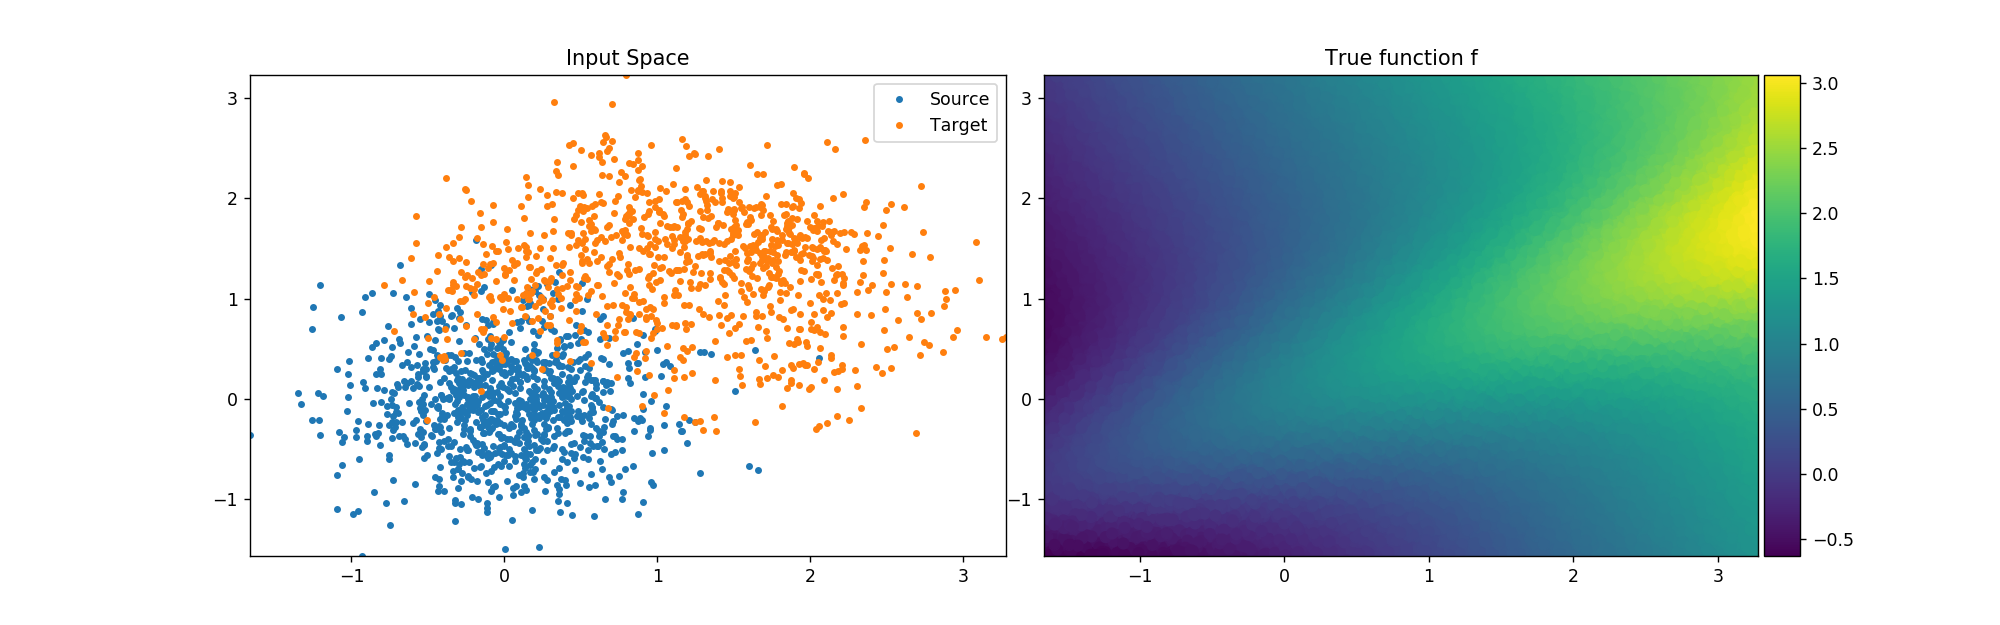

In [3]:
%matplotlib notebook
fig = plt.figure(figsize=(16, 5))
gs = gridspec.GridSpec(1, 2, width_ratios=[1,1])
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='5%', pad=0.05)

ax1.plot(Xs[:, 0], Xs[:, 1], '.', label="Source")
ax1.plot(Xt[:, 0], Xt[:, 1], '.', label="Target")

xmax = np.max(np.concatenate((np.max(Xs, 0).reshape(1, -1), np.max(Xt, 0).reshape(1, -1)), 0), 0)
xmin = np.min(np.concatenate((np.min(Xs, 0).reshape(1, -1), np.min(Xt, 0).reshape(1, -1)), 0), 0)
X = np.random.random((100000, 2)) * (xmax - xmin) + xmin
s = ax2.scatter(X[:, 0], X[:, 1], c=f(X))
fig.colorbar(s, cax=cax)

plt.subplots_adjust(wspace=0.05)

ax1.set_xlim(xmin[0], xmax[0])
ax1.set_ylim(xmin[1], xmax[1])
ax2.set_xlim(xmin[0], xmax[0])
ax2.set_ylim(xmin[1], xmax[1])

ax1.set_title("Input Space")
ax1.legend()
ax2.set_title("True function f")
plt.show()

In [5]:
np.random.seed(0)
model = MLPRegressor()
model.fit(Xs, ys)
y_pred = model.predict(X)
score = mean_absolute_error(yt, model.predict(Xt))
print("Target MAE = %.3f"%score)

Target Score = 0.122


<IPython.core.display.Javascript object>


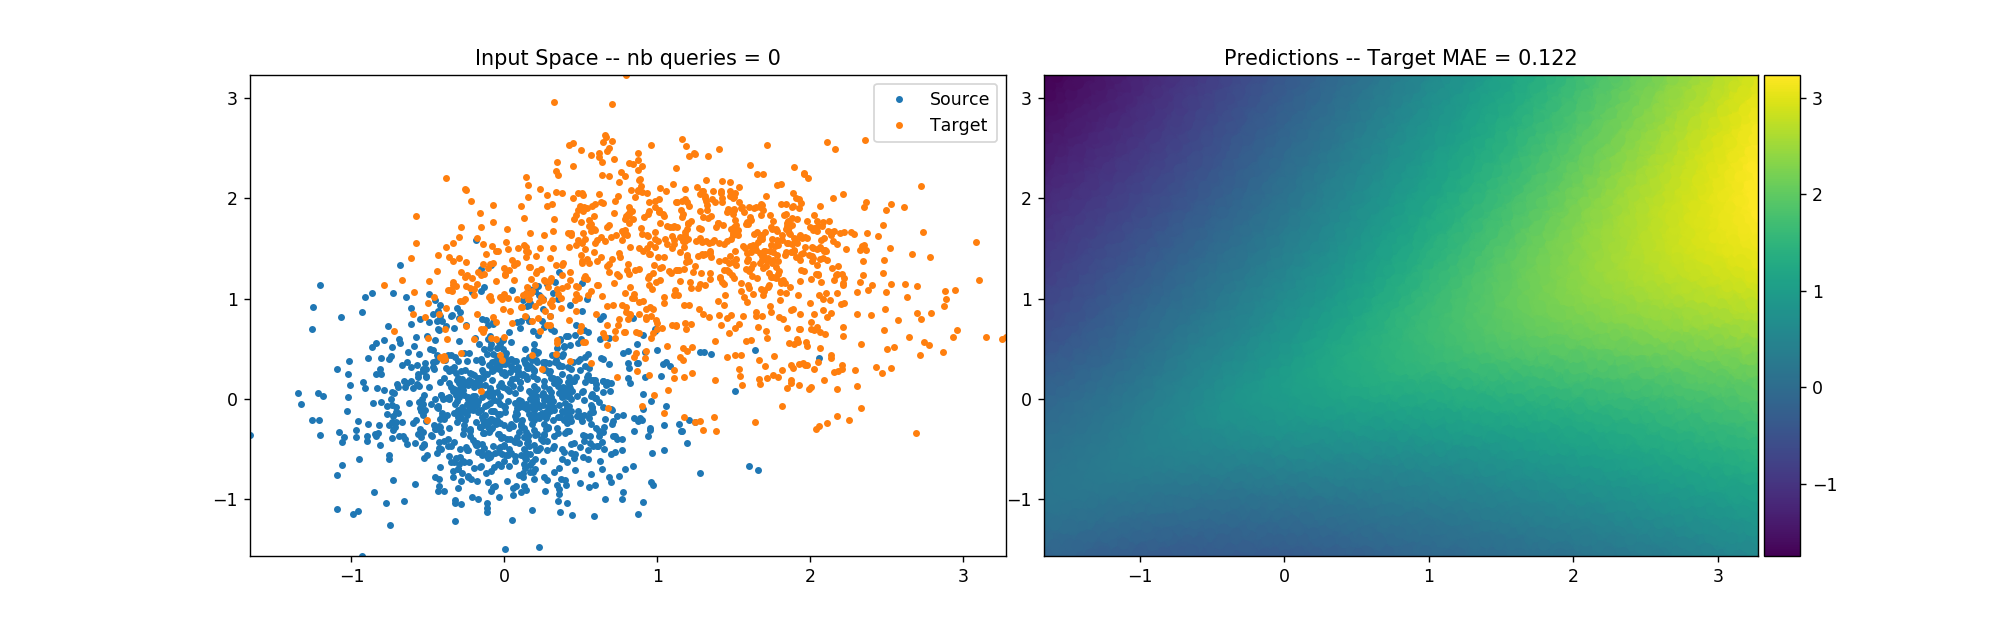

Text(0.5, 1.0, 'Predictions -- Target MAE = 0.122')

In [8]:
fig = plt.figure(figsize=(16, 5))
gs = gridspec.GridSpec(1, 2, width_ratios=[1,1])
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
plt.subplots_adjust(wspace=0.05)

divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='5%', pad=0.05)

ax1.plot(Xs[:, 0], Xs[:, 1], '.', label="Source")
ax1.plot(Xt[:, 0], Xt[:, 1], '.', label="Target")
s = ax2.scatter(X[:, 0], X[:, 1], c=y_pred.ravel())
fig.colorbar(s, cax=cax)

ax1.set_xlim(xmin[0], xmax[0])
ax1.set_ylim(xmin[1], xmax[1])
ax2.set_xlim(xmin[0], xmax[0])
ax2.set_ylim(xmin[1], xmax[1])

ax1.set_title("Input Space -- nb queries = %i"%0)
ax1.legend()
ax2.set_title("Predictions -- Target MAE = %.3f"%score)

In [9]:
np.random.seed(0)
kmedoids = KMedoidsQuery()
kmedoids.fit(Xt, Xs, ys, 10)
queries = kmedoids.predict(10)

In [10]:
np.random.seed(0)
model = MLPRegressor()
model.fit(np.concatenate((Xs, Xt[queries])), np.concatenate((ys, yt[queries])))
y_pred = model.predict(X)
score = mean_absolute_error(yt, model.predict(Xt))
print("Target MAE = %.3f"%score)

Target MAE = 0.077


In [65]:
def animate(i):
    
    if i%10 == 0:
        i = int(i/10)
        ax1.clear()
        ax2.clear()
        cax.clear()

        np.random.seed(0)
        if i !=0:
            model = UniformWeighting(MLPRegressor)
            model.fit(Xs, ys, Xt[queries[:i]], yt[queries[:i]])
        else:
            model = MLPRegressor()
            model.fit(Xs, ys)
        y_pred = model.predict(X)
        score = mean_absolute_error(yt, model.predict(Xt))

        ax1.plot(Xs[:, 0], Xs[:, 1], '.', label="Source")
        ax1.plot(Xt[:, 0], Xt[:, 1], '.', label="Target")
        if i !=0:
            ax1.plot(Xt[queries[:i], 0], Xt[queries[:i], 1], 'o', ms=10, markerfacecolor=(0,0,0,0.5), label="Queries", markeredgecolor=(0,0,0,1))
        s = ax2.scatter(X[:, 0], X[:, 1], c=y_pred.ravel())
        fig.colorbar(s, cax=cax)

        ax1.set_xlim(xmin[0], xmax[0])
        ax1.set_ylim(xmin[1], xmax[1])
        ax2.set_xlim(xmin[0], xmax[0])
        ax2.set_ylim(xmin[1], xmax[1])

        ax1.set_title("Input Space -- nb queries = %i"%i)
        ax1.legend()
        ax2.set_title("Predictions -- Target MAE = %.3f"%score)

<IPython.core.display.Javascript object>


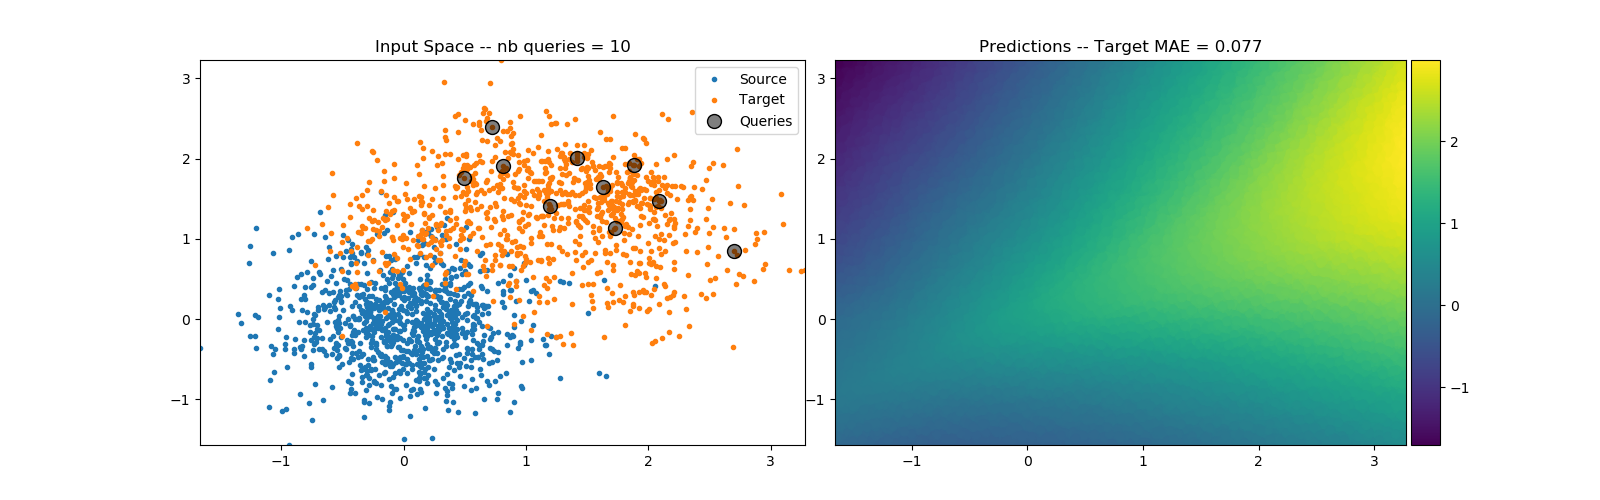

In [66]:
fig = plt.figure(figsize=(16, 5))
gs = gridspec.GridSpec(1, 2, width_ratios=[1,1])
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
plt.subplots_adjust(wspace=0.05)

divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='5%', pad=0.05)

In [67]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=20)

In [68]:
ani = animation.FuncAnimation(fig, animate, frames=109, repeat=False)
ani.save('KmedoidsQuery.mp4', writer=writer)